# Introducing the Tile

Most projects evaluate their methods on an handful scores whose use is mainly motivated by comparison purposes. Cosnidering that scores have specific meaning, it is more interesting to consider many scores to better understand the behavior of models. That is why the Tile, a visualizaion tool for two-class problems, was introduced.

The Tile considers an infinite familly of ranking scores that are conditionned on both importances (**a**, **b**) and performances (**TP**, **FP**, **FN**, **TN**) whose values can be obtained following:

$$R_{I_{a,b}} = \frac{(1-a)PTN + aPTP}{(1-a)PTN + (1-b)PFP + bPFN + aPTP}$$

where:
- $a$: Importance assigned to True Positives (TP).
- $b$: Importance assigned to False Negatives (FN).
- $PTN$: The probability of a True Negative (TN). 
- $PTP$: The probability of a True Positive (TP).
- $PFP$: The probability of a False Positive (FP).
- $PFN$: The probability of a False Negative (FN).

Many different well-known scores are in the Tile such as TPR, F1, Accuracy and so on. This notebook provides an example of a Tile with different scores in it.

In [1]:
import matplotlib.pyplot as plt

from sorbetto.tile.tile import Tile
from sorbetto.parameterization.parameterization_default import ParameterizationDefault
from sorbetto.annotation.annotation_text import AnnotationText
from sorbetto.ranking.ranking_score import RankingScore


In [5]:
Param_default = ParameterizationDefault()
empty_tile = Tile(name = "Canonical Ranking Score",
                       parameterization = Param_default)

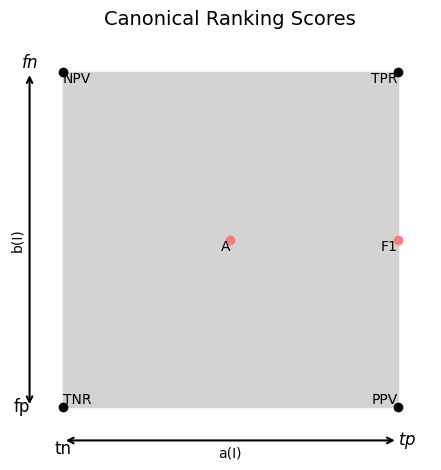

In [6]:
scores_list = [RankingScore.getAccuracy(),
               RankingScore.getTruePositiveRate(),
               RankingScore.getTrueNegativeRate(),
               RankingScore.getNegativePredictiveValue(),
               RankingScore.getPositivePredictiveValue(),
               RankingScore.getF(1.),
               #RankingScore.getSpecificity()
               ]

annotations_data = [
    (Param_default.locateRankingScore(score), score.abbreviation, {'markersize': 0}) for score in scores_list
]

annotations = [
    AnnotationText(location=pt, label=lbl, **options)
    for pt, lbl, options in annotations_data
]


fig, ax = empty_tile.draw()
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)

ax.fill_between([0, 1], 0, 1, color='lightgray', zorder=0)
tile = Tile(name = "Empty tile", parameterization=Param_default)

for i in range(len(annotations)):
    ann = annotations[i]
    data = annotations_data[i]
    if ann.name in ['F1', 'A']:
        ax.plot(data[0].x, data[0].y, 'o', color='lightcoral')
        ann.draw(tile, fig, ax, )
    else:
        ax.plot(data[0].x, data[0].y, 'o', color='black')
        ann.draw(tile, fig, ax)

# Hide ticks & spines
ax.set_xticks([])
ax.set_yticks([])
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)

ax.set_title("Canonical Ranking Scores", fontsize=14, pad=10)

arrowprops = dict(arrowstyle="<->", lw=1.5, color='black')
ax.annotate('', xy=(1.0, -0.1), xytext=(0.0, -0.1), arrowprops=arrowprops)  # x-axis
ax.annotate('', xy=(-0.1, 1.0), xytext=(-0.1, 0.0), arrowprops=arrowprops)  # y-axis
ax.text(1.0, -0.1, "$tp$", ha='left', va='center', fontsize=12)
ax.text(0.0, -0.1, "tn", ha='center', va='top', fontsize=12)
ax.text(-0.1, 1.0, "$fn$", ha='center', va='bottom', fontsize=12)
ax.text(-0.1, 0.0, "fp", ha='right', va='center', fontsize=12)

ax.set_aspect('equal')
plt.tight_layout()
plt.show()